In [11]:
# Import the libraries and functions that you need, including curve_fit from scipy.optimize.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
# Set up a pandas dataframe from the MM_data.csv file you saved from the previous module.
# If you skipped nonlinear_regression_part_1, you can simply use the MM_data.csv
# file that is provided.
# create the filehandle
datafile = os.path.join('data', 'MM_data.csv')

# import the data
rates_df = pd.read_csv(datafile)

# inspect the data to make sure you have substrate concentrations and initial velocities
rates_df

,pNPP (mM),slopes,initial velocities
0,20.00,0.514091,34.272718
1,10.00,0.503140,33.542678
2,7.00,0.470435,31.362310
3,4.00,0.417021,27.801416
4,2.00,0.342445,22.829652
5,1.00,0.246260,16.417302
6,0.70,0.202843,13.522863
7,0.40,0.136443,9.096204
8,0.20,0.076442,5.096143
9,0.10,0.078070,5.204653


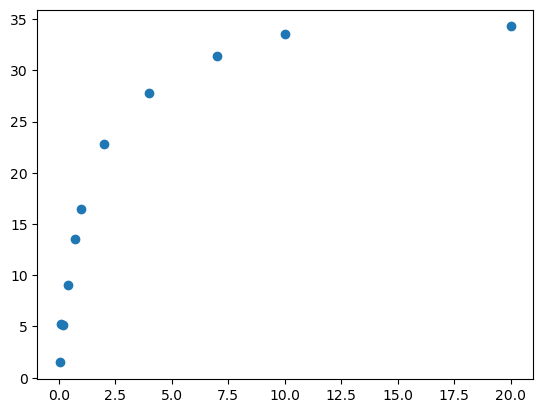

In [15]:
# Create your independent and dependent variables for curve fitting.
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']

# Inspect your data to make sure it looks like a Michaelis-Menten plot
plt.plot(xdata, ydata, 'o', label='data')

In [17]:
# Create a function for the equation you want to fit. The function should accept 
# as inputs the independent variable(s) and all the parameters to be fit.

def MM(SubConc, Vmax, Km):
    Vi = Vmax * SubConc/(Km + SubConc)
    return Vi

# Test the function to see if it produces the expected output

MM(rates_df['pNPP (mM)'], 100, 1)

0     95.238095
1     90.909091
2     87.500000
3     80.000000
4     66.666667
5     50.000000
6     41.176471
7     28.571429
8     16.666667
9      9.090909
10     4.761905
Name: pNPP (mM), dtype: float64

In [19]:
ydata = rates_df('initial velocities') # Common errors and how to read them

TypeError: 'DataFrame' object is not callable

In [21]:
# Correcting the error
ydata = rates_df['initial velocities']
ydata

0     34.272718
1     33.542678
2     31.362310
3     27.801416
4     22.829652
5     16.417302
6     13.522863
7      9.096204
8      5.096143
9      5.204653
10     1.487957
Name: initial velocities, dtype: float64

In [25]:
# Use the function curve_fit to fit your data.
popt, pcov = curve_fit(MM, xdata, ydata)

In [27]:
# Extract the fit parameters from the output of curve_fit.
Vmax = popt[0]
Km = popt[1]

# Extract one standard deviation for each parameter
stdev = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print('Vmax for this reaction:', Vmax, '+/-', stdev[0])
print('Km for this reaction:', Km, '+/-', stdev[1])

Vmax for this reaction: 36.65734834390893 +/- 0.6749595215280197
Km for this reaction: 1.1926322406324839 +/- 0.08042268476177238


In [33]:
print(f'Vmax for this reaction: {Vmax:.2f}')

Vmax for this reaction: 36.66


In [35]:
print(f'Vmax for this reaction: {Vmax:.2f} +/- {stdev[0]:.2f}')

Vmax for this reaction: 36.66 +/- 0.67


In [39]:
print(f'Km for this reaction: {Km:.3f} +/- {stdev[1]:.3f}')

Km for this reaction: 1.193 +/- 0.080


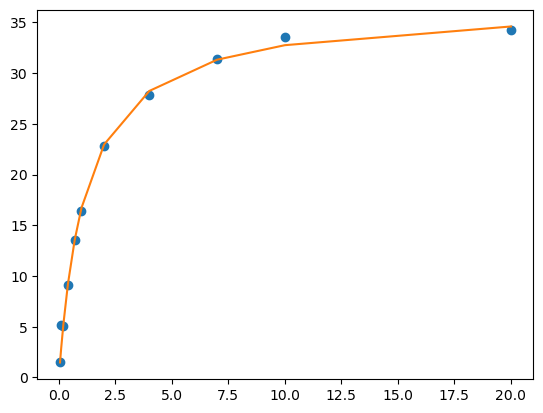

In [41]:
fit_y = MM(xdata, Vmax, Km) # calculates y values based on the curve_fit parameters
# using your fit model to see how well your model fits the data.

# Graph your original data and the fit equation
plt.plot(xdata, ydata, 'o', label='data') # the experimental data
plt.plot(xdata, fit_y, '-', label='fit') # the fit equation

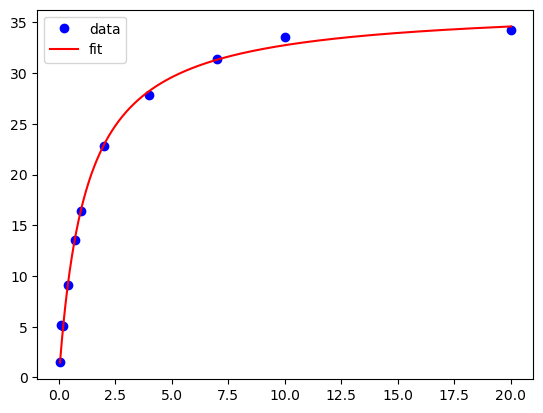

In [43]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000) # x value range with 1000 points
smooth_y = MM(smooth_x, Vmax, Km) # y values for the 1000 points in smooth_x

plt.plot(xdata, ydata, 'bo', label='data') # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'r', label = 'fit') # plot of the fit data
plt.legend() # legend added

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Eric\AppData\Local\Temp\ipykernel_19736\3721971291.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('V$_i$ ($\mu$M/min)')


Text(7.5, 16, 'Km = 1.19 +/- 0.08')

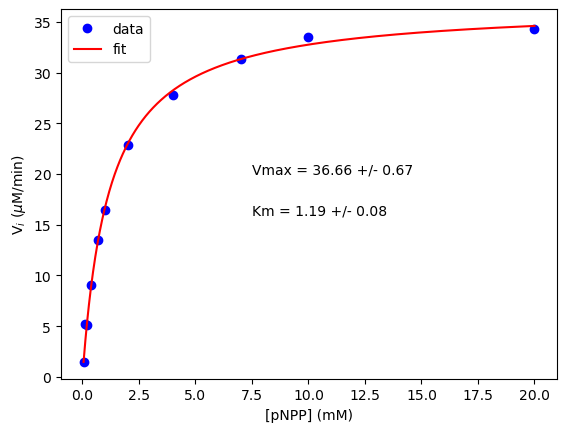

In [47]:
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000)
smooth_y = MM(smooth_x, Vmax, Km)

plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(smooth_x, smooth_y, 'r', label = 'fit')
plt.legend()

plt.xlabel('[pNPP] (mM)')
plt.ylabel('V$_i$ ($\mu$M/min)')
plt.annotate(F'Vmax = {Vmax:.2f} +/- {stdev[0]:.2f}', xy = (7.5, 20))
plt.annotate(F'Km = {Km:.2f} +/- {stdev[1]:.2f}', xy = (7.5, 16))